<h1><font color="black">Project 5</font></h1>

In [18]:
import random
from random import randint
import matplotlib.pyplot as plt

<h2><font color="black">Testing Single NAND and NOR Gates</font></h2>

Nand Gate States: 
A = 0, B = 0, Out = True
A = 0, B = 1, Out = True
A = 1, B = 0, Out = True
A = 1, B = 1, Out = False

Nor Gate States: 
A = 0, B = 0, Out = True
A = 0, B = 1, Out = False
A = 1, B = 0, Out = False
A = 1, B = 1, Out = False


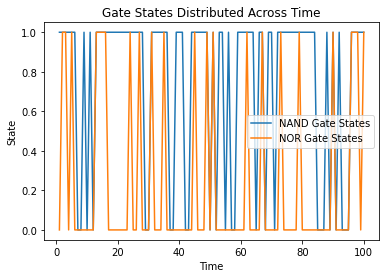

In [19]:
# Wires are inputs and outputs. Only outputs should connect to inputs
class Net:
    def __init__(self, owner, name, state=0):
        self.value = None
        self.owner = owner
        self.name = name
        self.connects = []
        self.state = state

    # Define connections in the net
    def connect(self, inputs):
        # If the input is not a list type, make it so
        if not isinstance(inputs, list):
            inputs = [inputs]
        # Append all inputs in list
        for input in inputs:
            self.connects.append(input)

    # Set the binary value for some variable
    def set(self, value):
        if self.value == value:
            return    
        self.value = value
        if self.state:
            self.owner.evaluate()
        for con in self.connects:
            con.set(value)

# Class for the baseline logic
class Logic:
    def __init__(self, name):
        self.name = name

    def evaluate(self):
        return

# Class for a two input gate, inputs A and B and output C
class Gate(Logic): 
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')

# Nand Gate
class Nand(Gate): 
    def __init__(self, name):
        Gate.__init__(self, name)

    def evaluate(self):
        self.C.set(not(self.A.value and self.B.value))

# Nor Gate
class Nor(Gate):        
    def __init__(self, name):
        Gate.__init__(self, name)

    def evaluate(self):
        self.C.set(not(self.A.value or self.B.value))
    
# Testing Nand Gate
def testNand(a, b):
    Nand1 = Nand("Nand1")
    Nand1.A.set(a)
    Nand1.B.set(b)
    return Nand1.C.value

# Testing Nor Gate
def testNor(a, b):
    Nor1 = Nor("Nor1")
    Nor1.A.set(a)
    Nor1.B.set(b)
    return Nor1.C.value

# Initialize lists and variables
time = []
NandState = []
NorState = []
t = 0
tempNand = 0
tempNor = 0

# Loop 100 times
while t < 100:
    # Fill two numbers with a random 0 OR 1
    val1 = random.randint(0, 1)
    val2 = random.randint(0, 1)
    Nand1 = testNand(val1, val2)
    Nor1 = testNor(val1, val2)
        
    t += 1
    NandState.append(Nand1)
    NorState.append(Nor1)
    time.append(t)

# Test all nand gate states explicitely
print("Nand Gate States: ")
print("A = 0, B = 0, Out = " + str(testNand(0, 0)))
print("A = 0, B = 1, Out = " + str(testNand(0, 1)))
print("A = 1, B = 0, Out = " + str(testNand(1, 0)))
print("A = 1, B = 1, Out = " + str(testNand(1, 1)))
print("")
# Test all nor gate states explicitely
print("Nor Gate States: ")
print("A = 0, B = 0, Out = " + str(testNor(0, 0)))
print("A = 0, B = 1, Out = " + str(testNor(0, 1)))
print("A = 1, B = 0, Out = " + str(testNor(1, 0)))
print("A = 1, B = 1, Out = " + str(testNor(1, 1)))

# Plot Random Nand results
plt.plot(time,NandState)
# Plot Random Nor results
plt.plot(time,NorState)
plt.title('Gate States Distributed Across Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend(['NAND Gate States', 'NOR Gate States'])

<h3><font color="black">Testing an OR Gate with Three NAND Gates</font></h3>

NandOR Gate States: 
A = 0, B = 0, Out = False
A = 0, B = 1, Out = True
A = 1, B = 0, Out = True
A = 1, B = 1, Out = True


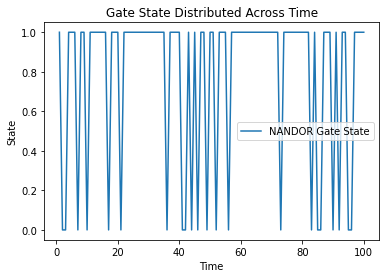

In [20]:
# Wires are inputs and outputs. Only outputs should connect to inputs
class Net:
    def __init__(self, owner, name, state=0):
        self.value = None
        self.owner = owner
        self.name = name
        self.connects = []
        self.state = state

    # Define connections in the net
    def connect(self, inputs):
        # If the input is not a list type, make it so
        if not isinstance(inputs, list):
            inputs = [inputs]
        # Append all inputs in list
        for input in inputs:
            self.connects.append(input)

    # Set the binary value for some variable
    def set(self, value):
        if self.value == value:
            return    
        self.value = value
        if self.state:
            self.owner.evaluate()
        for con in self.connects:
            con.set(value)

# Class for the baseline logic
class Logic:
    def __init__(self, name):
        self.name = name

    def evaluate(self):
        return

# Class for a two input gate, inputs A and B and output C
class Gate(Logic): 
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')

# Nand Gate
class Nand(Gate): 
    def __init__(self, name):
        Gate.__init__(self, name)

    def evaluate(self):
        self.C.set(not(self.A.value and self.B.value))
        
class NandOR(Logic):         
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')
        self.Nand1 = Nand("Nand1")
        self.Nand2 = Nand("Nand2")
        self.Nand3 = Nand("Nand3")
        self.A.connect([self.Nand1.A, self.Nand1.B])
        self.B.connect([self.Nand2.A, self.Nand2.B])
        self.Nand1.C.connect([self.Nand3.A])
        self.Nand2.C.connect([self.Nand3.B])
        self.Nand3.C.connect([self.C])
        
def testNandOR(a, b):
    NandOR1 = NandOR("NandOR1")
    NandOR1.A.set(a)
    NandOR1.B.set(b)
    return NandOR1.C.value
    
# Initialize lists and variables
time = []
NandORState = []
t = 0
tempNandOR = 0

# Loop 100 times
while t < 100:
    # Fill two numbers with a random 0 OR 1
    val1 = random.randint(0, 1)
    val2 = random.randint(0, 1)
    NandOR1 = testNandOR(val1, val2)
        
    t += 1
    NandORState.append(NandOR1)
    time.append(t)
    
# Test all nandOR gate states
print("NandOR Gate States: ")
print("A = 0, B = 0, Out = " + str(testNandOR(0, 0)))
print("A = 0, B = 1, Out = " + str(testNandOR(0, 1)))
print("A = 1, B = 0, Out = " + str(testNandOR(1, 0)))
print("A = 1, B = 1, Out = " + str(testNandOR(1, 1)))

# Plot Random nandOR results
plt.plot(time,NandORState)
plt.title('Gate State Distributed Across Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend(['NANDOR Gate State'])

<h3><font color="black">Testing an AND Gate with Three NOR Gates</font></h3>

NorAND Gate States: 
A = 0, B = 0, Out = False
A = 0, B = 1, Out = False
A = 1, B = 0, Out = False
A = 1, B = 1, Out = True


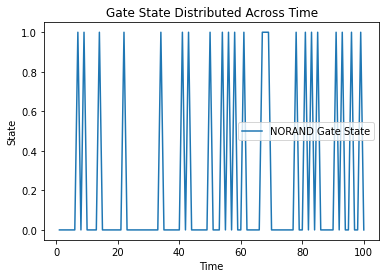

In [21]:
# Wires are inputs and outputs. Only outputs should connect to inputs
class Net:
    def __init__(self, owner, name, state=0):
        self.value = None
        self.owner = owner
        self.name = name
        self.connects = []
        self.state = state

    # Define connections in the net
    def connect(self, inputs):
        # If the input is not a list type, make it so
        if not isinstance(inputs, list):
            inputs = [inputs]
        # Append all inputs in list
        for input in inputs:
            self.connects.append(input)

    # Set the binary value for some variable
    def set(self, value):
        if self.value == value:
            return    
        self.value = value
        if self.state:
            self.owner.evaluate()
        for con in self.connects:
            con.set(value)

# Class for the baseline logic
class Logic:
    def __init__(self, name):
        self.name = name

    def evaluate(self):
        return

# Class for a two input gate, inputs A and B and output C
class Gate(Logic): 
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')

# Nor Gate
class Nor(Gate):        
    def __init__(self, name):
        Gate.__init__(self, name)

    def evaluate(self):
        self.C.set(not(self.A.value or self.B.value))
        
class NorAND(Logic):         
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')
        self.Nor1 = Nor("Nor1")
        self.Nor2 = Nor("Nor2")
        self.Nor3 = Nor("Nor3")
        self.A.connect([self.Nor1.A, self.Nor1.B])
        self.B.connect([self.Nor2.A, self.Nor2.B])
        self.Nor1.C.connect([self.Nor3.A])
        self.Nor2.C.connect([self.Nor3.B])
        self.Nor3.C.connect([self.C])
        
def testNorAND(a, b):
    NorAND1 = NorAND("NorAND1")
    NorAND1.A.set(a)
    NorAND1.B.set(b)
    return NorAND1.C.value
    
# Initialize lists and variables
time = []
NorANDState = []
t = 0
tempNorAND = 0

# Loop 100 times
while t < 100:
    # Fill two numbers with a random 0 OR 1
    val1 = random.randint(0, 1)
    val2 = random.randint(0, 1)
    NorAND1 = testNorAND(val1, val2)
        
    t += 1
    NorANDState.append(NorAND1)
    time.append(t)
    
# Test all norAND gate states
print("NorAND Gate States: ")
print("A = 0, B = 0, Out = " + str(testNorAND(0, 0)))
print("A = 0, B = 1, Out = " + str(testNorAND(0, 1)))
print("A = 1, B = 0, Out = " + str(testNorAND(1, 0)))
print("A = 1, B = 1, Out = " + str(testNorAND(1, 1)))

# Plot Random norAND results
plt.plot(time,NorANDState)
plt.title('Gate State Distributed Across Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend(['NORAND Gate State'])

<h2><font color="black">Testing the NAND Gate D-Latch</font></h2>

D-Latch Gate Q States: 
A = 0, B = 0, Out = True
A = 0, B = 1, Out = True
A = 1, B = 0, Out = True
A = 1, B = 1, Out = True

D_Latch Gate Q' States: 
A = 0, B = 0, Out = True
A = 0, B = 1, Out = False
A = 1, B = 0, Out = True
A = 1, B = 1, Out = True


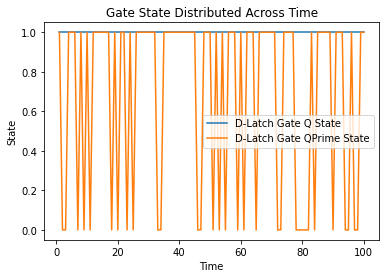

In [22]:
# Wires are inputs and outputs. Only outputs should connect to inputs
class Net:
    def __init__(self, owner, name, state=0):
        self.value = None
        self.owner = owner
        self.name = name
        self.connects = []
        self.state = state

    # Define connections in the net
    def connect(self, inputs):
        # If the input is not a list type, make it so
        if not isinstance(inputs, list):
            inputs = [inputs]
        # Append all inputs in list
        for input in inputs:
            self.connects.append(input)

    # Set the binary value for some variable
    def set(self, value):
        if self.value == value:
            return    
        self.value = value
        if self.state:
            self.owner.evaluate()
        for con in self.connects:
            con.set(value)

# Class for the baseline logic
class Logic:
    def __init__(self, name):
        self.name = name

    def evaluate(self):
        return

# Class for a two input gate, inputs A and B and output C
class Gate(Logic): 
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C', state=0)

# Nand Gate
class Nand(Gate): 
    def __init__(self, name):
        Gate.__init__(self, name)

    def evaluate(self):
        self.C.set(not(self.A.value and self.B.value))
        
class D_Latch(Logic):         
    def __init__(self, name):
        Logic.__init__(self, name)
        self.A = Net(self, 'A', state=1)
        self.B = Net(self, 'B', state=1)
        self.C = Net(self, 'C')
        self.Q = Net(self, 'Q')
        self.QPrime = Net(self, 'QPrime')
        self.Nand1 = Nand("Nand1")
        self.Nand2 = Nand("Nand2")
        self.Nand3 = Nand("Nand3")
        self.Nand4 = Nand("Nand4")
        self.A.connect([self.Nand1.A])
        self.B.connect([self.Nand1.B, self.Nand2.B])
        self.Nand1.C.connect([self.Nand2.A, self.Nand3.A])
        self.Nand2.C.connect([self.Nand4.A]) 
        self.Nand3.C.connect([self.Nand4.B, self.QPrime])
        self.Nand4.C.connect([self.Nand3.B, self.Q])
        
def testD_Latch(a, b):
    D_Latch1 = D_Latch("D_Latch1")
    D_Latch1.A.set(a)
    D_Latch1.B.set(b)
    return D_Latch1.Q.value, D_Latch1.QPrime.value

# Initialize lists and variables
time = []
D_LatchState0 = []
D_LatchState1 = []
t = 0
tempD_Latch = 0

# Loop 100 times
while t < 100:
    # Fill two numbers with a random 0 OR 1
    val1 = random.randint(0, 1)
    val2 = random.randint(0, 1)
    D_Latch0 = testD_Latch(val1, val2)[0]
    D_Latch1 = testD_Latch(val1, val2)[1]
        
    t += 1
    D_LatchState0.append(D_Latch0)
    D_LatchState1.append(D_Latch1)
    time.append(t)
    
# Test all D-Latch gate Q states
print("D-Latch Gate Q States: ")
print("A = 0, B = 0, Out = " + str(testD_Latch(0, 0)[0]))
print("A = 0, B = 1, Out = " + str(testD_Latch(0, 1)[0]))
print("A = 1, B = 0, Out = " + str(testD_Latch(1, 0)[0]))
print("A = 1, B = 1, Out = " + str(testD_Latch(1, 1)[0]))
print("")
# Test all D-Latch gate Q' states
print("D_Latch Gate Q' States: ")
print("A = 0, B = 0, Out = " + str(testD_Latch(0, 0)[1]))
print("A = 0, B = 1, Out = " + str(testD_Latch(0, 1)[1]))
print("A = 1, B = 0, Out = " + str(testD_Latch(1, 0)[1]))
print("A = 1, B = 1, Out = " + str(testD_Latch(1, 1)[1]))

# Plot Random D-Latch results
plt.plot(time, D_LatchState0)
plt.plot(time, D_LatchState1)
plt.title('Gate State Distributed Across Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend(['D-Latch Gate Q State', 'D-Latch Gate QPrime State'])

<h3><font color="black">Understanding A Past Recursive Error</font></h3>

<h4><font color="black">This error is a guard against stack overflow and can occur when there is no base case in your recursive function, so it has no stopping point. The function below finds the maximum depth of the Python interpreter stack.</font></h4>

In [8]:
# Error: maximum recursion depth exceeded in comparison
import sys
# Print the maximum length of the stack
print(sys.getrecursionlimit())

3000


<h2><font color="black">Analysis</font></h2>

<h4><font color="black">All combinational circuits work as intended. The sequential D-latch circuit is not working as intended.</font></h4>